In [1]:
""" An  Image classifier which differentiates Cats and Dogs images is built. ImageDataGenerator is used to create training and validation
batches. The training set contains images without Image Augmentation. """

# To select latest tf version
try:
  %tensorflow_version 2.x
except Exception:
  pass

# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator #This ones new
import logging
tf.get_logger().setLevel(logging.ERROR)
import os

TensorFlow 2.x selected.


In [2]:
# Dataset is loaded externally, not from tfds
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract=True)
zip_dir_base = os.path.dirname(zip_dir)
# Command for printing directory structure
!find $zip_dir_base -type d -print

68608000/68606236 [==============================] - 0s 0us/step
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
# Creating training and validation datasets for cats and dogs images
base_dir = os.path.join(zip_dir_base,'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
num_tr = num_cats_tr + num_dogs_tr
num_val = num_cats_val + num_dogs_val
print(num_tr,num_val)

2000 1000


In [0]:
BATCH_SIZE = 100
IMG_SIZE = 150

# Data Augmentation is done at this stage. It's done in "CatsVSDogsWithDataAugmentation.ipynb"
train_image_generator = ImageDataGenerator(rescale = 1./255)
val_image_generator = ImageDataGenerator(rescale = 1./255)

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                          shuffle=True,
                                                          directory = train_dir,
                                                          target_size=(IMG_SIZE,IMG_SIZE),
                                                          class_mode='binary')
val_data_gen = val_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                      target_size = (IMG_SIZE,IMG_SIZE),
                                                      shuffle = False,
                                                      directory=validation_dir,
                                                      class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


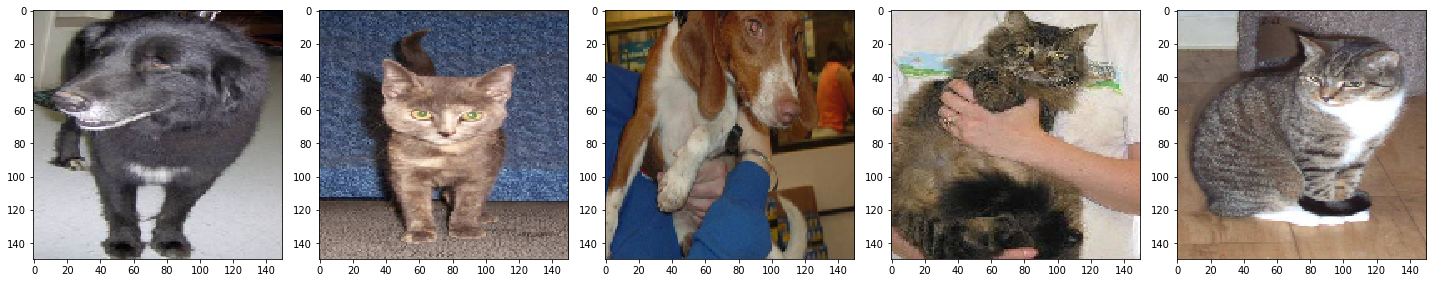

In [11]:
# Function to plot the images on (1,5) grid
def plot_images(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plot_images(sample_training_images[:5])

In [0]:
# Building Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [13]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
             metrics=['accuracy'])
# Shows properties of model like Weights, Input Shapes of each layer, etc.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
# Training the model
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(num_tr/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(num_val/float(BATCH_SIZE)))    
)  

Train for 20 steps, validate for 10 steps
Epoch 1/10
20/20 [==============================] - 8s 405ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8253 - val_accuracy: 0.7320
Epoch 2/10
20/20 [==============================] - 8s 399ms/step - loss: 0.0449 - accuracy: 0.9840 - val_loss: 1.8583 - val_accuracy: 0.6970
Epoch 3/10
20/20 [==============================] - 8s 404ms/step - loss: 0.0688 - accuracy: 0.9750 - val_loss: 1.2404 - val_accuracy: 0.7360
Epoch 4/10
20/20 [==============================] - 8s 405ms/step - loss: 0.0355 - accuracy: 0.9870 - val_loss: 1.4783 - val_accuracy: 0.7310
Epoch 5/10
20/20 [==============================] - 8s 403ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 1.5012 - val_accuracy: 0.7390
Epoch 6/10
20/20 [==============================] - 8s 400ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.4211 - val_accuracy: 0.7640
Epoch 7/10
20/20 [==============================] - 8s 404ms/step - loss: 0.0018 - accuracy: 1.0000 - val_

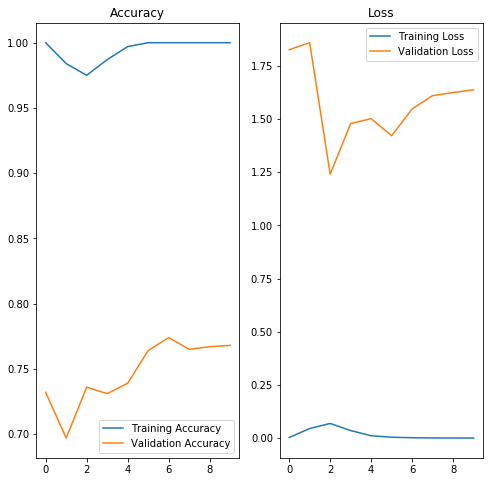

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS_RANGE = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Accuracy")
plt.plot(EPOCHS_RANGE, acc, label="Training Accuracy")
plt.plot(EPOCHS_RANGE, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(EPOCHS_RANGE, loss, label="Training Loss")
plt.plot(EPOCHS_RANGE, val_loss, label="Validation Loss")
plt.legend(loc="upper right")

# Even though model is trained only for 10 epochs, still the Validation Accuracy for more epochs is significantly lower than Training Epochs.